# Paramagnetic Relaxation

In [1]:
#!!pip install git+https://github.com/alsinmr/pyRelaxSim.git
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub')
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync')
import pyRelaxSim as RS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Build the spin system
For relaxation induced by exchange, we always build the spin system with at least two different sets of interactions. Not all interactions must change, but at least one interaction should be different– otherwise no relaxation will occure. Note that best-practice is to build the first spin-system, and copy it and only edit the parameters that are changed in the second spin-system.

pyRelaxSim takes the main experimental parameters (excepting rf fields) upon initialization of a spin-system, and then interactions are added afterwards.

In [3]:
ex0=RS.ExpSys(v0H=600,vr=0,Nucs=['13C','e'],LF=True)     #1-spin system at 600 MHz (14.1 T)
ex0.set_inter(Type='hyperfine',i0=0,i1=1,Axx=5e4,Ayy=5e5,Azz=5e5)    #Hyperfine coupling

In [4]:
L=RS.Liouvillian(ex0)
L.add_relax(Type='T2',i=1,T2=1e-10)
L.add_relax(Type='T1',i=1,T1=1e-9)
# L.add_relax(Type='T1',i=0,T1=5)
# L.add_relax(Type='T2',i=0,T2=.1)
L.add_relax(Type='recovery')

In [5]:
U=L.U(Dt=1/100000)**500

<IPython.core.display.Javascript object>


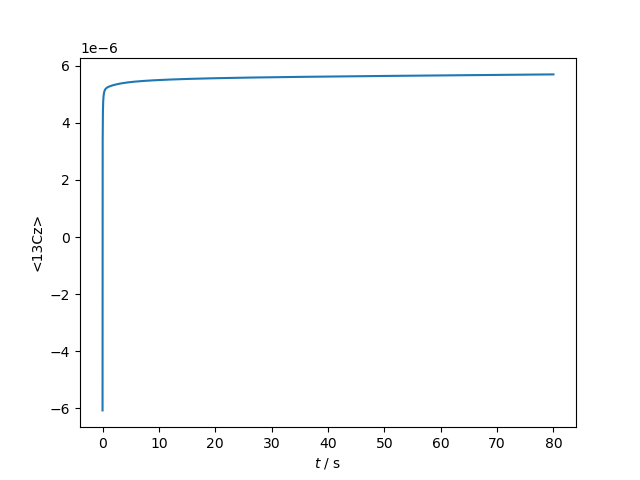

In [6]:
rho=RS.Rho(rho0='-13Cz',detect='13Cz')
rho.DetProp(U,n=16000)
ax=rho.plot(FT=False,axis='s',imag=False)
# _=ax.set_ylim([0,2e-5])

In [7]:
ex0.Peq

array([ 1.21512887e-05, -3.17904187e-02])

In [8]:
print(L[0].Ln(0)@rho._rho0) #This and the next line should have the same result
print(L[0].recovery@rho._rho0) 
#Nothing but recovery should interaction with the identity

#Furthermore, this should yield minus the product of the Ln(0) and the equilibrium density operator
print((L[0].Ln(0)@L.rho_eq(sub1=True))/(L[0].recovery@rho._rho0))

[-7.94769858e+06-5.42101086e-20j  3.42666440e+03+1.80614202e+03j
 -3.06237804e+00+1.73474784e+00j -5.23956772e+03+5.04474988e+03j
  3.42666440e+03-1.80614202e+03j  7.94769858e+06-1.73472348e-18j
  7.88446021e+01+2.08088726e+03j  3.14473361e+00-1.69101266e+00j
 -3.06237804e+00-1.73474784e+00j  7.88446021e+01-2.08088726e+03j
 -7.94751079e+06+1.73472348e-18j -3.42658248e+03-1.80609795e+03j
 -5.23956772e+03-5.04474988e+03j  3.14473361e+00+1.69101266e+00j
 -3.42658248e+03+1.80609795e+03j  7.94751080e+06+2.16840434e-19j]
[-7.94769858e+06-5.42101086e-20j  3.42666440e+03+1.80614202e+03j
 -3.06237804e+00+7.25445325e-01j -5.23956772e+03+5.04617725e+03j
  3.42666440e+03-1.80614202e+03j  7.94769858e+06-1.73472348e-18j
  7.88446021e+01+2.08756778e+03j  3.14473361e+00-6.81710139e-01j
 -3.06237804e+00-7.25445325e-01j  7.88446021e+01-2.08756778e+03j
 -7.94751079e+06+1.73472348e-18j -3.42658248e+03-1.80609795e+03j
 -5.23956772e+03-5.04617725e+03j  3.14473361e+00+6.81710139e-01j
 -3.42658248e+03+1.80609

In [9]:
(L.rho_eq(sub1=True)*np.eye(4).reshape(16)).sum()  #This line should be 0
#Since rho_eq sub1 should have zero contribution from the identity

(1.1102230246251565e-16+0j)

In [10]:
print(L[0].L(0)@(rho._rho0+L.rho_eq(sub1=True)))  #This should be all zeros if rho0='zero'
#This is because this should yield the position of thermal equilibrium
print(U@(rho._rho0+L.rho_eq(sub1=True))-(rho._rho0+L.rho_eq(sub1=True)))  #Then, this should also yield zero I guess

[-1.89940631e-03+4.33680869e-19j  3.44452873e+03+1.79226060e+03j
  3.94203213e-02+1.03260760e+00j -5.23618949e+03+5.06778929e+03j
  3.44452873e+03-1.79226060e+03j -1.48415565e-05+1.73472348e-18j
 -1.46610203e-05+2.08008963e+03j  4.29352458e-02-9.88872415e-01j
  3.94203213e-02-1.03260760e+00j -1.46610198e-05-2.08008963e+03j
 -1.45137310e-05-1.73472348e-18j -3.44444638e+03-1.79221686e+03j
 -5.23618949e+03-5.06778929e+03j  4.29352458e-02+9.88872415e-01j
 -3.44444638e+03+1.79221686e+03j  1.92870200e-03+0.00000000e+00j]
[[ 2.22117326e-06-6.29535301e-14j -1.82499834e-16+2.22636491e-17j
   4.13441378e-10+6.30527919e-11j ... -4.14178963e-10+6.32231314e-11j
  -1.82912742e-16-2.20883745e-17j -2.22117313e-06-2.46630716e-13j]
 [ 2.16430845e-06-3.99895758e-14j  5.00852651e-10-3.17717796e-09j
   4.03374015e-10-2.64885886e-09j ... -4.34794302e-10-2.85049778e-09j
  -5.00840539e-10-3.17710043e-09j -2.16309186e-06-4.10122880e-14j]
 [ 3.46449369e-07-3.93639065e-14j  1.63730059e-09-7.20137075e-10j
   1.94

In [15]:
L.rho_eq()

array([0.24205534+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.25795074+0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.24204945+0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.25794447+0.j])

In [16]:
ex0.Peq

array([ 1.21512887e-05, -3.17904187e-02])

In [25]:
(L.rho_eq(sub1=False)*ex0.Op[0].z.reshape(16)).sum()*2

(1.2151224664358473e-05+0j)

In [26]:
print(RS.Rho(rho0='Thermal',detect='13Cz',L=L)._rho0-RS.Rho(rho0='zero',detect='13Cz',L=L)()._rho0)
print(L.rho_eq(sub1=True))  #These should be the same, since they should both yield the thermal equilibrium

[-7.94466294e-03+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  7.95073855e-03+0.j
  1.00621361e-09+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  1.00621361e-09+0.j -7.95054641e-03+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  7.94447079e-03+0.j]
[-7.94466294e-03+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  7.95073855e-03+0.j
  1.00621361e-09+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  1.00621361e-09+0.j -7.95054641e-03+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  7.94447079e-03+0.j]


In [27]:
rho1=RS.Rho(rho0='Thermal',detect='13Cz',L=L)
print(L[0].L(0)@rho1._rho0)
print(L.U(Dt=1/100000)[0]@rho1._rho0-rho1._rho0)

[-2.09183781e-11+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  1.81898940e-12+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  2.91038305e-11+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
 -1.45519152e-11+0.j]
[ 7.68199393e-12-5.18402543e-11j  6.22978275e-17+1.52891167e-16j
 -6.52683769e-17+1.24085602e-16j  0.00000000e+00+0.00000000e+00j
  5.48111461e-18-2.66854598e-18j  7.40074668e-12-5.34516812e-11j
  2.44613905e-17-1.53859256e-17j -1.02115321e-16+9.81053175e-17j
  1.37283849e-20-3.55611802e-20j  8.57766646e-17+7.39066881e-17j
 -1.05867537e-11-6.87725865e-11j  6.08976536e-18+1.49833869e-19j
  0.00000000e+00+0.00000000e+00j  1.72708667e-21-3.80919782e-20j
 -6.35276212e-17-4.49848719e-18j -1.72138415e-11-6.46104663e-11j]


In [28]:
U=L.U(Dt=1/100000)

In [29]:
U.eig()
d,v=U._eig[0]

In [30]:
d

array([ 1.00000000e+00-2.38673801e-10j,  9.99998000e-01-2.36501889e-10j,
        7.68200340e-01-1.11668270e-01j,  7.68200340e-01+1.11668271e-01j,
        4.53999298e-05+1.46158240e-15j,  4.53998390e-05+1.72220166e-15j,
        5.78644318e-05-8.41137477e-06j,  5.78644319e-05+8.41137487e-06j,
       -1.91045938e-17-2.14967232e-17j, -5.35067617e-18-3.35226683e-17j,
        6.76726794e-18+2.62282583e-17j, -8.32457315e-19-2.97393121e-19j,
       -1.76078442e-21-4.46200829e-21j,  2.20455367e-31+1.87559232e-31j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j])

In [31]:
rho_eq=v[:,0]/np.abs(v[:,0]).sum()

In [32]:
rho_eq/L.rho_eq()

<ipython-input-32-f737bb78910f>:1: RuntimeWarning: invalid value encountered in true_divide
  rho_eq/L.rho_eq()


array([ 1. +0.j, nan+nanj, nan+nanj, nan+nanj, nan+nanj,  1. +0.j,
        1. +0.j, nan+nanj, nan+nanj,  1. +0.j,  1. +0.j, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj,  1. +0.j])

In [38]:
L.rho_eq()

array([2.42055337e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 2.57950738e-01+0.j,
       1.00621361e-09+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       1.00621361e-09+0.j, 2.42049453e-01+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       2.57944470e-01+0.j])

In [50]:
ex0.Peq

array([ 1.21512887e-05, -3.17904187e-02])

In [51]:
ex0.T_K=100
ex0.Peq

array([ 3.62108403e-05, -9.44846994e-02])

In [52]:
L=RS.Liouvillian(ex0)

In [56]:
L.rho_eq()

array([ 2.26387021e-01+1.26414134e-34j, -5.30960865e-10+4.12581343e-10j,
       -4.82214177e-10+3.74702894e-10j, -1.59889489e-10-6.27168288e-10j,
       -5.30960865e-10-4.12581343e-10j,  2.73631079e-01+3.05084313e-34j,
        2.34335304e-09+4.24443830e-34j,  5.82846074e-10-4.52898569e-10j,
       -4.82214177e-10-3.74702894e-10j,  2.34335304e-09+2.39478090e-34j,
        2.26370624e-01+3.70313736e-34j,  5.30922414e-10-4.12551464e-10j,
       -1.59889489e-10+6.27168288e-10j,  5.82846074e-10+4.52898569e-10j,
        5.30922414e-10+4.12551464e-10j,  2.73611265e-01+3.24973713e-34j])

In [57]:
(2.73631e-1-2.26387e-1)/(2.73631e-1+2.26387e-1)

0.09448459855445204

In [ ]:
L.rho_eq()*ex0.Op[1].Sz